In [1]:
from statistics import quantiles

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [ ]:
# How Education Drives Economic Growth

# This dataset explores the relationship between education and economic performance across countries and continents. It combines key indicators such as literacy rates, physician density, GDP metrics, and unemployment to uncover patterns and insights into how human capital contributes to national prosperity.

In [2]:
dataset = pd.read_csv('education_economy_data.csv')
print(dataset.shape)
dataset.head()

(191, 9)


,Country,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),GDP per Capita Category,Unemployment Rate (%),Continent
0,Afghanistan,43.0,0.28,1.723305e+10,2.710887,415.707417,Very Low,13.991,Asia
1,Albania,98.1,1.20,2.354718e+10,3.936625,8575.171134,Mid,10.108,Europe
2,Algeria,81.4,1.72,2.476260e+11,4.100000,5364.027950,Low,11.701,Africa
3,Andorra,100.0,3.33,3.785067e+09,2.583555,46812.448450,High,3.700,Europe
4,Angola,71.1,0.21,8.482465e+10,1.001289,2308.159767,Low,14.537,Africa


In [20]:
taxa_alfabetismo_per_capita = dataset[dataset['GDP per Capita (Current USD)'] >= 35_000]

print(taxa_alfabetismo_per_capita.shape)

(30, 9)


In [22]:
numeros_alfabetizados = taxa_alfabetismo_per_capita['Literacy Rate']

q1 = numeros_alfabetizados.quantile(0.25)
q3 = numeros_alfabetizados.quantile(0.75)

entre_quartis = numeros_alfabetizados[(numeros_alfabetizados >= q1) & (numeros_alfabetizados <= q3)]

media = np.mean(numeros_alfabetizados)
mediana = np.median(numeros_alfabetizados)
quartis = np.quantile(numeros_alfabetizados, [0.25, 0.50, 0.75, 1])
desvio_padrao = np.std(numeros_alfabetizados)
variancia = np.var(numeros_alfabetizados)

print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Quartis: {quartis}")
print(f"Desvio-Padrão: {desvio_padrao:.2f}")
print(f"Variância: {variancia:.2f}")

Média: 98.65
Mediana: 99.00
Quartis: [ 99.  99.  99. 100.]
Desvio-Padrão: 1.23
Variância: 1.51


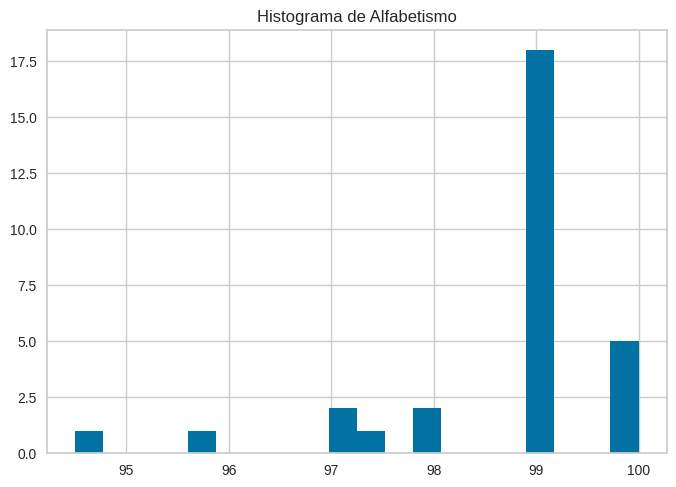

In [23]:
# Testando Normalidade - Histograma

plt.hist(numeros_alfabetizados, bins=20)
plt.title("Histograma de Alfabetismo")
plt.show()

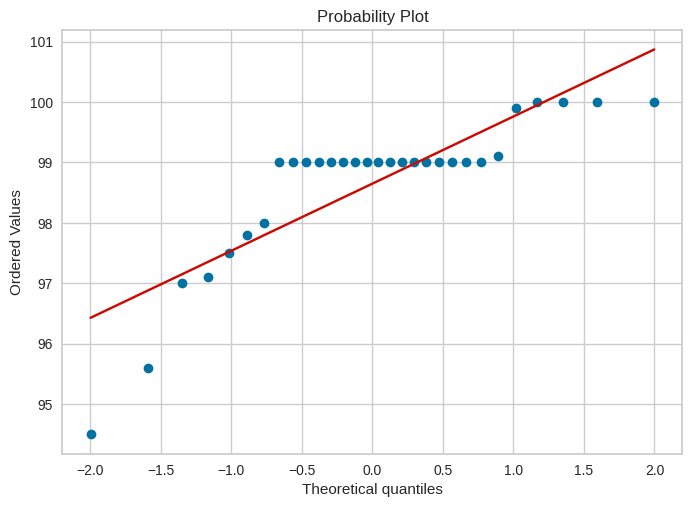

In [24]:
# Teste de Normailidade - Gráfico Q-Q Plot

fig, ax = plt.subplots()
stats.probplot(numeros_alfabetizados, fit=True,   plot=ax)
plt.show()

In [25]:
# Teste de Normalidade - Shapiro

stats.shapiro(numeros_alfabetizados)

ShapiroResult(statistic=np.float64(0.7437581225423892), pvalue=np.float64(7.230754559265781e-06))

In [ ]:
# Pelo Teste de Normalidade a distribuição de taxa de alfabetização com relação ao PIB per capita não estão distribuídos normalmente. Rejeita-se a hipótese nula.